In [18]:
import sklearn.decomposition as sk_decomp
from sklearn import linear_model as lm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import cross_val_score as cvs
import os

In [19]:
meth_even = pd.read_csv("processed_data\combined_data\split_with_background\\2mers_extend200\combined_2mers_meth_even_with_background.tsv", sep="\t")
meth_odd = pd.read_csv("processed_data\combined_data\split_with_background\\2mers_extend200\combined_2mers_meth_odd_with_background.tsv", sep="\t")
unmeth_even = pd.read_csv("processed_data\combined_data\split_with_background\\2mers_extend200\combined_2mers_unmeth_even_with_background.tsv", sep="\t")
unmeth_odd = pd.read_csv("processed_data\combined_data\split_with_background\\2mers_extend200\combined_2mers_unmeth_odd_with_background.tsv", sep="\t")
#unmeth = pd.read_csv("processed_data\combined_data\split_with_background\combined_2mers_unmeth.tsv", sep="\t")

In [21]:
nrow = 244

In [22]:
meth_even = meth_even.loc[meth_even["cancer"]=="Healthy"]
meth_odd = meth_odd.loc[meth_odd["cancer"]=="Healthy"]
unmeth_even = unmeth_even.loc[unmeth_even["cancer"]=="Healthy"]
unmeth_odd = unmeth_odd.loc[unmeth_odd["cancer"]=="Healthy"]

#meth = meth.iloc[: , :-1]
#unmeth = unmeth.iloc[: , :-1]

In [23]:
frames = [meth_even,meth_odd,unmeth_even,unmeth_odd]
combo = pd.concat(frames)
combo = combo.iloc[: , :-1]

In [24]:
combo

,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,GG,GT,TA,TC,TG,TT
1,0.745990,1.96173,1.11633,1.06069,0.472634,1.15924,0.486418,0.673300,0.372710,1.03007,0.597585,0.711159,0.905156,2.48168,1.16541,1.16446
4,0.765763,2.01639,1.09923,1.17116,0.462408,1.14968,0.473197,0.697738,0.376041,1.08205,0.571893,0.804584,0.785160,2.35608,1.12315,1.18776
5,0.744810,2.03043,1.09679,1.25016,0.433465,1.09801,0.426635,0.729441,0.383215,1.01126,0.544227,0.746060,0.805039,2.48263,1.13847,1.24765
9,0.762464,2.01932,1.08753,1.23212,0.468885,1.15671,0.412302,0.718048,0.356838,1.04431,0.590990,0.784199,0.776410,2.36859,1.22165,1.09521
10,0.783611,2.15769,1.06376,1.13057,0.466868,1.15945,0.434469,0.700167,0.388226,1.05507,0.615569,0.752697,0.813164,2.33952,1.15691,1.09604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,0.719510,2.02020,1.07042,1.28103,0.467627,1.15975,0.466745,0.776905,0.388823,1.01623,0.593686,0.829405,0.797598,2.21233,1.07633,1.10239
468,0.740424,2.01603,1.05992,1.25795,0.475606,1.16153,0.443819,0.776800,0.408043,1.06517,0.605775,0.761583,0.746509,2.22170,1.08054,1.10393
469,0.672713,2.02407,1.08743,1.26710,0.466236,1.17846,0.561951,0.788253,0.349123,1.03766,0.577392,0.767032,0.701140,2.25140,1.08905,1.17003
470,0.710253,1.99392,1.07577,1.25817,0.520687,1.19428,0.454294,0.781651,0.347698,1.02218,0.585120,0.825931,0.743380,2.18608,1.08733,1.12826


In [25]:
pca = sk_decomp.PCA(n_components=2)
combo = pca.fit_transform(combo)

In [26]:
def column(matrix, i):
    return [row[i] for row in matrix]

In [27]:
x = column(combo,1)
y = column(combo,0)

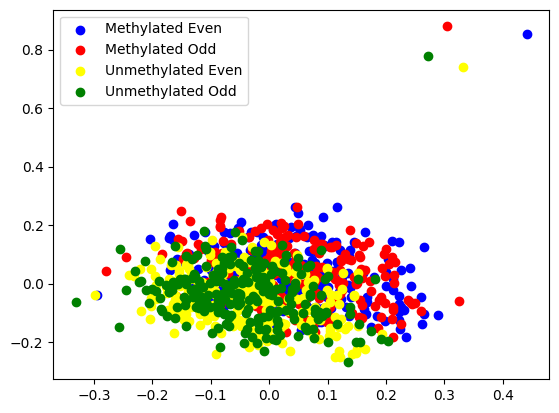

In [33]:
plt.scatter(x[nrow*0:nrow*1],y[nrow*0:nrow*1],color = "blue", label="Methylated Even")
plt.scatter(x[nrow*1:nrow*2],y[nrow*1:nrow*2], color = "red", label="Methylated Odd")
plt.scatter(x[nrow*2:nrow*3],y[nrow*2:nrow*3], color ="yellow", label="Unmethylated Even")
plt.scatter(x[nrow*3:nrow*4],y[nrow*3:nrow*4], color = "green", label="Unmethylated Odd")
plt.legend()
#plt.savefig("All_healthy" + ".png")